# Real-world Data Wrangling

## 1. Gather data

### **1.1.** Problem Statement

Understanding the dynamics of Pokémon battles is crucial for trainers. In this project, I aim to analyze the strengths and weaknesses of Pokémon by examining their attributes and matchups in battles. I'll be wrangling two datasets: one obtained through web scraping, and another manually collected dataset. This way I will be able to answer questions such as:
> Which Pokémon types have the highest Total Stats against all other types?
> And which pokemons have the highest attack against all types overall?
<br>

#### **Dataset 1**

Type: CSV

Method: The data was gathered via manually downloading through Kaggle's website. 

Link: https://www.kaggle.com/datasets/lunamcbride24/pokemon-type-matchup-data

 
This dataset contains information about damage multipliers for different Pokémon types. I chose this dataset because it allows me to calculate attack  for various Pokémon types, which can be useful for joining and analyzing data with the other dataset. By understanding how different types of attacks affect Pokémon, I can gain insights into their strengths, weaknesses, and battle strategies.

Dataset variables:
<br>
- `Name`: Name of the Pokémon<br>
- `Number`: Pokémon's Pokedex Number<br>
- `Normal`: Damage Multiplier for Normal Types (attacks against the Pokémon)<br>
- `Fire`: Damage Multiplier for Fire Types<br>
- `Water`: Damage Multiplier for Water Types<br>
- `Electric`: Damage Multiplier for Electric Types<br>
- `Grass`: Damage Multiplier for Grass Types<br>
- `Ice`: Damage Multiplier for Ice Types<br>
- `Fighting`: Damage Multiplier for Fighting Types<br>
- `Poison`: Damage Multiplier for Poison Types<br>
- `Ground`: Damage Multiplier for Ground Types<br>
- `Flying`: Damage Multiplier for Flying Types<br>
- `Psychic`: Damage Multiplier for Psychic Types<br>
- `Bug`: Damage Multiplier for Bug Types<br>
- `Rock`: Damage Multiplier for Rock Types<br>
- `Ghost`: Damage Multiplier for Ghost Types<br>
- `Dragon`: Damage Multiplier for Dragon Types<br>
- `Dark`: Damage Multiplier for Dark Types<br>
- `Steel`: Damage Multiplier for Steel Types<br>
- `Fairy`: Damage Multiplier for Fairy Types<br>


In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
dirty_kaggle_matchups = pd.read_csv('PokeTypeMatchupData.csv')
dirty_kaggle_matchups.head(3)

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,#001,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
1,Ivysaur,#002,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5
2,Venusaur,#003,*1,*2,*0.5,*0.5,*0.25,*2,*0.5,*1,*1,*2,*2,*1,*1,*1,*1,*1,*1,*0.5


#### Dataset 2

Type: CSV

Method: The data was gathered using BeautifulSoup library to scrape a website. 
Link to the website: https://pokemondb.net/pokedex/all

Dataset variables:
<br>
`ID`: Pokemon unique identification number.<br>
`Name`: Pokemon name.<br>
`Type 1`: Primary AND secondary type of Pokemon.<br>
`Type 2`: Secondary type of Pokemon.<br>
`Total`: Overall strength of the Pokemon.<br>
`HP`: Health points, or how much damage it can take.<br>
`Attack`: Strength of normal attacks.<br>
`Defense`: Ability to resist normal attacks.<br>
`SP Atk`: Strength of special attacks.<br>
`SP Def`: Ability to resist special attacks<br>
`Speed`: Determines the order of attacks in battles<br>

In [4]:
import csv
import requests
from bs4 import BeautifulSoup

In [5]:
# This is the site that contains a table with all 1025 Pokemons. Here I loaded it into the variable "url".
url = 'https://pokemondb.net/pokedex/all'

# HTTP request.
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    # Opening the csv file that will be used to store all the gathered data.
    with open('CompletePokemons.csv', 'w', newline='', encoding='utf-8') as csvfile:

        writer = csv.writer(csvfile)

        # Finding the table lines in the website (the table that stores the pokemon's information).
        rows = soup.find_all('tr')

        # Going through each line and extracting the data.
        for row in rows:

            cells = row.find_all('td')
            if len(cells) > 0:
                number = cells[0].text.strip()
                name = cells[1].text.strip()
                types = [a.text.strip() for a in cells[2].find_all('a')]
                total = cells[3].text.strip()
                hp = cells[4].text.strip()
                attack = cells[5].text.strip()
                defense = cells[6].text.strip()
                sp_atk = cells[7].text.strip()
                sp_def = cells[8].text.strip()
                speed = cells[9].text.strip()

                # Writing the data in the csv file.
                writer.writerow([number, name, ', '.join(types), total, hp, attack, defense, sp_atk, sp_def, speed])
else:
    print("Error accessing website:", response.status_code)


In [6]:
dirty_scraped_pokemons = pd.read_csv('CompletePokemons.csv')
dirty_scraped_pokemons.head(3)

,0001,Bulbasaur,"Grass, Poison",318,45,49,49.1,65,65.1,45.1
0,2,Ivysaur,"Grass, Poison",405,60,62,63,80,80,60
1,3,Venusaur,"Grass, Poison",525,80,82,83,100,100,80
2,3,Venusaur Mega Venusaur,"Grass, Poison",625,80,100,123,122,120,80


In [7]:
dirty_scraped_pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   0001           1214 non-null   int64 
 1   Bulbasaur      1214 non-null   object
 2   Grass, Poison  1214 non-null   object
 3   318            1214 non-null   int64 
 4   45             1214 non-null   int64 
 5   49             1214 non-null   int64 
 6   49.1           1214 non-null   int64 
 7   65             1214 non-null   int64 
 8   65.1           1214 non-null   int64 
 9   45.1           1214 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 95.0+ KB


## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Formatting issues.

In [8]:
# Programatically inspecting.
dirty_kaggle_matchups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      576 non-null    object
 1   Number    576 non-null    object
 2   Normal    576 non-null    object
 3   Fire      576 non-null    object
 4   Water     576 non-null    object
 5   Electric  576 non-null    object
 6   Grass     576 non-null    object
 7   Ice       576 non-null    object
 8   Fighting  576 non-null    object
 9   Poison    576 non-null    object
 10  Ground    576 non-null    object
 11  Flying    576 non-null    object
 12  Psychic   576 non-null    object
 13  Bug       576 non-null    object
 14  Rock      576 non-null    object
 15  Ghost     576 non-null    object
 16  Dragon    576 non-null    object
 17  Dark      576 non-null    object
 18  Steel     576 non-null    object
 19  Fairy     576 non-null    object
dtypes: object(20)
memory usage: 90.1+ KB


In [9]:
# Visually inspecting.
dirty_kaggle_matchups.sample(2, random_state=8)

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
455,Salazzle,#758,*1,*0.5,*2,*1,*0.25,*0.5,*0.5,*0.5,*4,*1,*2,*0.25,*2,*1,*1,*1,*0.5,*0.25
556,Morpeko,#877,*1,*1,*1,*0.5,*1,*1,*2,*1,*2,*0.5,*0,*2,*1,*0.5,*1,*0.5,*0.5,*2


Data Validity
<br>
The matchups dataset has formatting issues. The Number column, which is an important ID,  is stored as a string and contains # symbols. The * symbols are not needed since we can perform calculations directly on the numeric values without them.

### Quality Issue 2: Types.

In [10]:
dirty_kaggle_matchups.sample(2)

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
12,Pikachu,#025,*1,*1,*1,*0.5,*1,*1,*1,*1,*2,*0.5,*1,*1,*1,*1,*1,*1,*0.5,*1
258,Dusknoir,#477,*0,*1,*1,*1,*1,*1,*0,*0.5,*1,*1,*1,*0.5,*1,*2,*1,*2,*1,*1


In [11]:
dirty_scraped_pokemons.sample(2)

,0001,Bulbasaur,"Grass, Poison",318,45,49,49.1,65,65.1,45.1
671,554,Darumaka Galarian Darumaka,Ice,315,70,90,45,15,45,50
1147,968,Orthworm,Steel,480,70,85,145,60,55,65


In [12]:
dirty_kaggle_matchups.dtypes

Name        object
Number      object
Normal      object
Fire        object
Water       object
Electric    object
Grass       object
Ice         object
Fighting    object
Poison      object
Ground      object
Flying      object
Psychic     object
Bug         object
Rock        object
Ghost       object
Dragon      object
Dark        object
Steel       object
Fairy       object
dtype: object

In [13]:
dirty_scraped_pokemons.dtypes

0001              int64
Bulbasaur        object
Grass, Poison    object
318               int64
45                int64
49                int64
49.1              int64
65                int64
65.1              int64
45.1              int64
dtype: object

In the scraped dataframe all columns are currently stored as objects, which is not ideal. To ensure accurate computations and proper data handling, I will convert the data types of relevant columns to their appropriate types, such as integers or floats.

### Tidiness Issue 1: Two variables in a single cell.

In [14]:
# By getting a random sample we can see that the Type column sometimes has two types in it separated by commas.
dirty_scraped_pokemons.sample(2, random_state=7)

,0001,Bulbasaur,"Grass, Poison",318,45,49,49.1,65,65.1,45.1
445,362,Glalie Mega Glalie,Ice,580,80,120,80,120,80,100
289,228,Houndour,"Dark, Fire",330,45,60,30,80,50,65


In [15]:
dirty_scraped_pokemons['Grass, Poison'].value_counts()

Grass, Poison
Normal             82
Water              81
Psychic            47
Grass              47
Fire               37
                   ..
Fire, Dark          1
Fighting, Ice       1
Normal, Dragon      1
Psychic, Dragon     1
Poison, Ghost       1
Name: count, Length: 221, dtype: int64

In [16]:
# By counting how many times commas appear in the Type column we can see how many samples contain more than 1 type.
# This will be corrected in the cleaning phase.
dual_type_count = dirty_scraped_pokemons['Grass, Poison'].str.count(',') + 1
total = (dual_type_count > 1).sum()
print("Total occurrences of two types in one column:", total)

Total occurrences of two types in one column: 668


The data obtained through web scraping has a tidiness issue. Each Pokémon can have one or two types, but in this dataframe, both types (if they exist) are stored in the same column. For better organization, each type should have its own column. This ensures that each variable is in its own column, making the data easier to work with.

### Tidiness Issue 2: Missing header row.

In [17]:
dirty_scraped_pokemons.head(2)

,0001,Bulbasaur,"Grass, Poison",318,45,49,49.1,65,65.1,45.1
0,2,Ivysaur,"Grass, Poison",405,60,62,63,80,80,60
1,3,Venusaur,"Grass, Poison",525,80,82,83,100,100,80


In [18]:
# Here it's clear that the first row of the data is being interpreted as the header.
dirty_scraped_pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1214 entries, 0 to 1213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   0001           1214 non-null   int64 
 1   Bulbasaur      1214 non-null   object
 2   Grass, Poison  1214 non-null   object
 3   318            1214 non-null   int64 
 4   45             1214 non-null   int64 
 5   49             1214 non-null   int64 
 6   49.1           1214 non-null   int64 
 7   65             1214 non-null   int64 
 8   65.1           1214 non-null   int64 
 9   45.1           1214 non-null   int64 
dtypes: int64(8), object(2)
memory usage: 95.0+ KB


The DataFrame obtained through web scraping lacks the header row, violating the principle that column headers should be values, not variable names.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

### **Quality Issue 1: Formatting issues.**

In [19]:
# Copies of the datasets to ensure the raw dataframes 
# are not impacted
dirty_scraped_pokemons_copy = dirty_scraped_pokemons.copy()
dirty_kaggle_matchups_copy = dirty_kaggle_matchups.copy()

In [20]:
dirty_kaggle_matchups_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      576 non-null    object
 1   Number    576 non-null    object
 2   Normal    576 non-null    object
 3   Fire      576 non-null    object
 4   Water     576 non-null    object
 5   Electric  576 non-null    object
 6   Grass     576 non-null    object
 7   Ice       576 non-null    object
 8   Fighting  576 non-null    object
 9   Poison    576 non-null    object
 10  Ground    576 non-null    object
 11  Flying    576 non-null    object
 12  Psychic   576 non-null    object
 13  Bug       576 non-null    object
 14  Rock      576 non-null    object
 15  Ghost     576 non-null    object
 16  Dragon    576 non-null    object
 17  Dark      576 non-null    object
 18  Steel     576 non-null    object
 19  Fairy     576 non-null    object
dtypes: object(20)
memory usage: 90.1+ KB


In [21]:
 # Removing the # symbol.
dirty_kaggle_matchups['Number'] = dirty_kaggle_matchups['Number'].str.replace('#', '')

In [22]:
 # Removing the all of the asterisks.
for coluna in dirty_kaggle_matchups.columns[1:]:
    dirty_kaggle_matchups[coluna] = dirty_kaggle_matchups[coluna].str.replace('*', '')

In [23]:
# Seeing the changes.
dirty_kaggle_matchups.sample()

,Name,Number,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
54,Ponyta,077,1,0.5,2,1,0.5,0.5,1,1,2,1,1,0.5,2,1,1,1,0.5,0.5


After correcting the incorrect characters we now will be able to convert types more easily, and perform operations as well.

### **Quality Issue 2: Types.**

In [24]:
for coluna in dirty_kaggle_matchups.columns[1:]:
    # Convert object columns to float. I had to use the word "coluna" because "column" caused errors.
    dirty_kaggle_matchups[coluna] = dirty_kaggle_matchups[coluna].astype(float)

In [25]:
dirty_kaggle_matchups['Number'] = dirty_kaggle_matchups['Number'].astype(int)

In [26]:
dirty_kaggle_matchups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      576 non-null    object 
 1   Number    576 non-null    int64  
 2   Normal    576 non-null    float64
 3   Fire      576 non-null    float64
 4   Water     576 non-null    float64
 5   Electric  576 non-null    float64
 6   Grass     576 non-null    float64
 7   Ice       576 non-null    float64
 8   Fighting  576 non-null    float64
 9   Poison    576 non-null    float64
 10  Ground    576 non-null    float64
 11  Flying    576 non-null    float64
 12  Psychic   576 non-null    float64
 13  Bug       576 non-null    float64
 14  Rock      576 non-null    float64
 15  Ghost     576 non-null    float64
 16  Dragon    576 non-null    float64
 17  Dark      576 non-null    float64
 18  Steel     576 non-null    float64
 19  Fairy     576 non-null    float64
dtypes: float64(18), int64(1), object

In [27]:
clean_kaggle_matchups = dirty_kaggle_matchups.copy() # Saving it after the changes.

By updating the data types to the appropriate, the dataset is cleaner and easier to work with.

### Tidiness Issue 2: Missing header row.

In [28]:
# Defining the new header and the first row data
new_header = ['Number', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
first_row = ['0001', 'Bulbasaur', 'Grass, Poison', '318', '45', '49', '49.1', '65', '65.1', '45.1']
#Saving the first row in a new dataframe.
clean_scraped_pokemons = pd.DataFrame([first_row])
# Setting the header to the right one, and changing the old header in the dirty df so that we can concat it later.
clean_scraped_pokemons.columns = new_header
dirty_scraped_pokemons.columns = new_header
# Concatenating the clean and dirty dataframes so all the register are inserted in the new one. 
clean_scraped_pokemons = pd.concat([clean_scraped_pokemons, dirty_scraped_pokemons], ignore_index=True)

In [29]:
# Checking if it is alright now.
clean_scraped_pokemons.sample(4)

,Number,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
795,661,Fletchling,"Normal, Flying",278,45,50,43,40,38,62
749,624,Pawniard,"Dark, Steel",340,45,85,70,40,40,60
608,496,Servine,Grass,413,60,60,75,60,75,83
895,742,Cutiefly,"Bug, Fairy",304,40,45,40,55,40,84


In [30]:
print(clean_scraped_pokemons.columns)

Index(['Number', 'Name', 'Type', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed'],
      dtype='object')


In [31]:
clean_scraped_pokemons.dtypes

Number     object
Name       object
Type       object
Total      object
HP         object
Attack     object
Defense    object
Sp. Atk    object
Sp. Def    object
Speed      object
dtype: object

The rest of this problem will be addressed after tidiness issue no. 1.

### **Tidiness Issue 1: Two variables in a single cell.**

#### OBSERVATION: I addressed Tidiness Issue 2 first, allowing me to properly fix the rows that have more than one "type" occupying the same column now.

In [32]:
# Splitting the strings stored inside the "Type" column and putting them in separate columns.
clean_scraped_pokemons[['Primary Type', 'Secondary Type']] = clean_scraped_pokemons['Type'].str.split(', ', n=1, expand=True)

In [33]:
# Now I just need to remove the original Type column.
clean_scraped_pokemons = clean_scraped_pokemons.drop(['Type'], axis=1)

In [34]:
# And for the Pokemons that don't have a secondary type, I'll replace all the none
#values with "NA"
clean_scraped_pokemons.fillna("NA",inplace=True)

In [35]:
clean_scraped_pokemons.sample(5, random_state=4)

,Number,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Primary Type,Secondary Type
501,407,Roserade,515,60,70,65,125,105,90,Grass,Poison
166,126,Magmar,495,65,95,57,100,85,93,Fire,NA
358,288,Vigoroth,440,80,80,80,55,55,90,Normal,NA
1184,1000,Gholdengo,550,87,60,95,133,91,84,Steel,Ghost
518,420,Cherubi,275,45,35,45,62,53,35,Grass,NA


One of the things Hadley Wickham says in  his Article "Tidy Data" is that "Each variable forms a column". When the header is values, not variables, it is a serious issue. By fixing this we can now understand all of the columns, and perform analysis on the gathered data.

#### ! The next step is a part of  Tidiness Issue no. 2 cleaning.

In [36]:
# Now let's fix the types...

# Converting each column to numeric type, some of the values arent integers so I'll keep them as floats.
for coluna in clean_scraped_pokemons.columns[2:-2]:
    clean_scraped_pokemons[coluna] = clean_scraped_pokemons[coluna].astype(float)
# And the Number.
clean_scraped_pokemons['Number'] = clean_scraped_pokemons['Number'].astype(int)


In [37]:
clean_scraped_pokemons.dtypes

Number              int64
Name               object
Total             float64
HP                float64
Attack            float64
Defense           float64
Sp. Atk           float64
Sp. Def           float64
Speed             float64
Primary Type       object
Secondary Type     object
dtype: object

Tidiness Issuel no.2 justification: 
Doing this I can now ensure that the dataframe has the correct names for the columns (and correct types as well), making it easier to combine the datasets!

### **Remove unnecessary variables and combine datasets.**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [38]:
clean_scraped_pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Number          1215 non-null   int64  
 1   Name            1215 non-null   object 
 2   Total           1215 non-null   float64
 3   HP              1215 non-null   float64
 4   Attack          1215 non-null   float64
 5   Defense         1215 non-null   float64
 6   Sp. Atk         1215 non-null   float64
 7   Sp. Def         1215 non-null   float64
 8   Speed           1215 non-null   float64
 9   Primary Type    1215 non-null   object 
 10  Secondary Type  1215 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 104.5+ KB


In [39]:
#Since they both have the number id I'll join them together using it.
clean_kaggle_matchups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      576 non-null    object 
 1   Number    576 non-null    int64  
 2   Normal    576 non-null    float64
 3   Fire      576 non-null    float64
 4   Water     576 non-null    float64
 5   Electric  576 non-null    float64
 6   Grass     576 non-null    float64
 7   Ice       576 non-null    float64
 8   Fighting  576 non-null    float64
 9   Poison    576 non-null    float64
 10  Ground    576 non-null    float64
 11  Flying    576 non-null    float64
 12  Psychic   576 non-null    float64
 13  Bug       576 non-null    float64
 14  Rock      576 non-null    float64
 15  Ghost     576 non-null    float64
 16  Dragon    576 non-null    float64
 17  Dark      576 non-null    float64
 18  Steel     576 non-null    float64
 19  Fairy     576 non-null    float64
dtypes: float64(18), int64(1), object

In [40]:
combined_df = pd.merge(clean_scraped_pokemons, clean_kaggle_matchups, on="Name", how="inner")

In [41]:
combined_df.sample(3)

,Number_x,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Primary Type,...,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
374,692,Clauncher,330.0,50.0,53.0,62.0,58.0,63.0,44.0,Water,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
280,557,Dwebble,325.0,50.0,65.0,85.0,35.0,35.0,55.0,Bug,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
148,275,Shiftry,480.0,90.0,100.0,60.0,90.0,60.0,80.0,Grass,...,0.5,2.0,0.0,4.0,1.0,0.5,1.0,0.5,1.0,2.0


In [42]:
# Removing columns that I will not use.
columns_to_drop = ['Number_y', 'Number_x', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'HP']
combined_df = combined_df.drop(columns=columns_to_drop)

In [43]:
combined_df.head(5)

,Name,Total,Attack,Primary Type,Secondary Type,Normal,Fire,Water,Electric,Grass,...,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,318.0,49.0,Grass,Poison,1.0,2.0,0.5,0.5,0.25,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,405.0,62.0,Grass,Poison,1.0,2.0,0.5,0.5,0.25,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,525.0,82.0,Grass,Poison,1.0,2.0,0.5,0.5,0.25,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Charmander,309.0,52.0,Fire,NA,1.0,0.5,2.0,1.0,0.50,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,Charmeleon,405.0,64.0,Fire,NA,1.0,0.5,2.0,1.0,0.50,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [44]:
# Not all Pokémon were  in the Kaggle database, 
#but that's ok. I'll do the analysis using the available data.
combined_df.shape

(526, 23)

In [45]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            526 non-null    object 
 1   Total           526 non-null    float64
 2   Attack          526 non-null    float64
 3   Primary Type    526 non-null    object 
 4   Secondary Type  526 non-null    object 
 5   Normal          526 non-null    float64
 6   Fire            526 non-null    float64
 7   Water           526 non-null    float64
 8   Electric        526 non-null    float64
 9   Grass           526 non-null    float64
 10  Ice             526 non-null    float64
 11  Fighting        526 non-null    float64
 12  Poison          526 non-null    float64
 13  Ground          526 non-null    float64
 14  Flying          526 non-null    float64
 15  Psychic         526 non-null    float64
 16  Bug             526 non-null    float64
 17  Rock            526 non-null    flo

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [46]:
combined_df.to_csv('clean_combined_df.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 

>Which Pokémon types have the highest average attack against all other types?

In [47]:
import matplotlib.pyplot as plt

In [48]:
# To find the strongest Pokémon types, I will calculate the mean total stats 
# (sum of HP, Attack, Speed, etc.) for each primary type.
subset_type_mean = combined_df.groupby('Primary Type')['Total'].mean().sort_values(ascending=False)

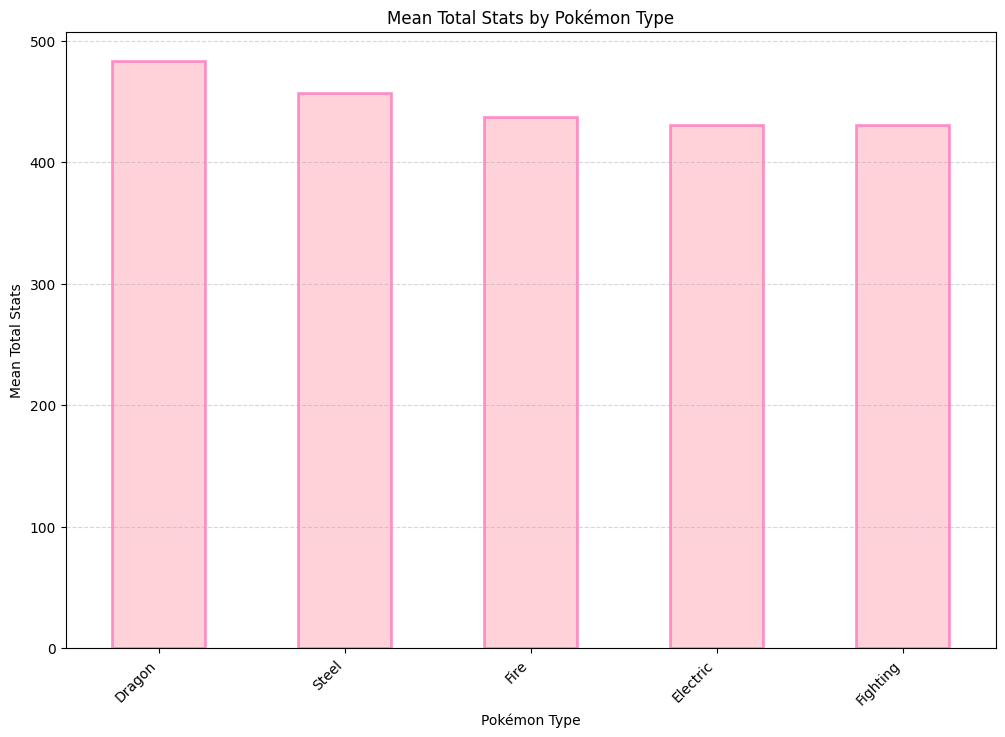

In [49]:
# Plotting the top 5 strongest types.
plt.figure(figsize=(12, 8))
subset_type_mean.head(5).plot(kind='bar', color='pink', alpha=0.7, edgecolor='hotpink', linewidth=2, linestyle='-')
plt.title('Mean Total Stats by Pokémon Type')
plt.xlabel('Pokémon Type')
plt.ylabel('Mean Total Stats')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Out of all the pokemon types the ones with highest average total atk damage are "Dragon", "Fire" and "Steel". The strongest one must be from one of these types. 

In [50]:
# Now I'll separate them in another dataframe so the calculus can be performed more easily.
type_columns = [
    'Normal', 'Fire', 'Water', 'Electric', 'Grass', 'Ice',
    'Fighting', 'Poison', 'Ground', 'Flying', 'Psychic', 
    'Bug', 'Rock', 'Ghost', 'Dragon', 'Dark', 'Steel', 'Fairy'
]

strongest = combined_df[combined_df['Primary Type'].isin(type_columns)]
strongest.head()

,Name,Total,Attack,Primary Type,Secondary Type,Normal,Fire,Water,Electric,Grass,...,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy
0,Bulbasaur,318.0,49.0,Grass,Poison,1.0,2.0,0.5,0.5,0.25,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,Ivysaur,405.0,62.0,Grass,Poison,1.0,2.0,0.5,0.5,0.25,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,Venusaur,525.0,82.0,Grass,Poison,1.0,2.0,0.5,0.5,0.25,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,Charmander,309.0,52.0,Fire,NA,1.0,0.5,2.0,1.0,0.50,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
4,Charmeleon,405.0,64.0,Fire,NA,1.0,0.5,2.0,1.0,0.50,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [51]:
# Now I'll create another dataframe to store the values that will be multiplied (Attack * type multiplier)
attack_df = pd.DataFrame(columns=type_columns)

In [52]:
attack_df = pd.DataFrame()

for idx, row in combined_df.iterrows():
    damages = {} # Dictionary to store damage for each type
#Calculating damage for each type using the current row's attack:
    for types in type_columns:
        damage = row['Attack'] * row[types]
        damages[types] = damage
    attack_df = pd.concat([attack_df, pd.DataFrame([damages])], ignore_index=True)

In [53]:
#Calculating the total damage for each Pokémon by summing their attacks against different types.
attack_df['Total Damage'] = attack_df.sum(axis=1)

In [54]:
#Calculating the mean damage for each Pokémon by averaging their attacks against different types.
attack_df['Mean Damage'] = attack_df.mean(axis=1)

In [55]:
attack_df.head()

,Normal,Fire,Water,Electric,Grass,Ice,Fighting,Poison,Ground,Flying,Psychic,Bug,Rock,Ghost,Dragon,Dark,Steel,Fairy,Total Damage,Mean Damage
0,49.0,98.0,24.5,24.5,12.25,98.0,24.5,49.0,49.0,98.0,98.0,49.0,49.0,49.0,49.0,49.0,49.0,24.5,943.25,99.289474
1,62.0,124.0,31.0,31.0,15.50,124.0,31.0,62.0,62.0,124.0,124.0,62.0,62.0,62.0,62.0,62.0,62.0,31.0,1193.50,125.631579
2,82.0,164.0,41.0,41.0,20.50,164.0,41.0,82.0,82.0,164.0,164.0,82.0,82.0,82.0,82.0,82.0,82.0,41.0,1578.50,166.157895
3,52.0,26.0,104.0,52.0,26.00,26.0,52.0,52.0,104.0,52.0,52.0,26.0,104.0,52.0,52.0,52.0,26.0,26.0,936.00,98.526316
4,64.0,32.0,128.0,64.0,32.00,32.0,64.0,64.0,128.0,64.0,64.0,32.0,128.0,64.0,64.0,64.0,32.0,32.0,1152.00,121.263158


In [56]:
# Inserting name column.
attack_df['Name'] = combined_df['Name']

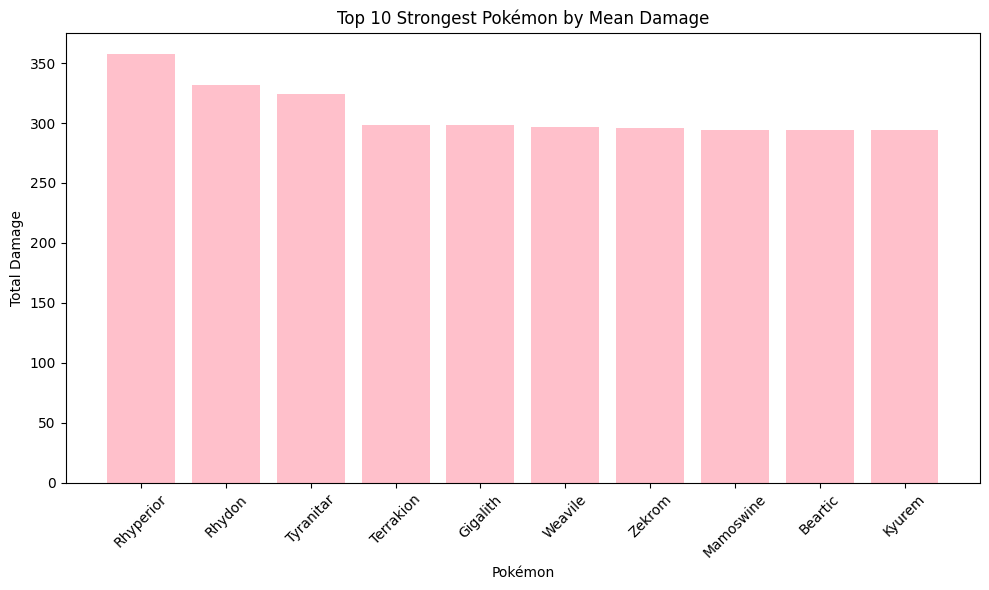

In [57]:
# Sorting the datafram so that the pokemons with highest mean damage are at the top, making it easier to plot de chart.
sorted_attack_df = attack_df.sort_values(by='Mean Damage', ascending=False)

# Selecting the 10 strongest.
top_10 = sorted_attack_df.head(10)

# Creating the bar plor.
plt.figure(figsize=(10, 6))
plt.bar(top_10['Name'], top_10['Mean Damage'], color='pink')
plt.xlabel('Pokémon')
plt.ylabel('Total Damage')
plt.title('Top 10 Strongest Pokémon by Mean Damage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the analysis of the top 10 Pokémon with the highest mean total damage against all types, I conclude that Rhyperior, Rhydon, and Tyranitar stand out as the strongest Pokémon. These findings are based on the available data.

### **5.2:** Reflection

If I had more time, I'd make this project better by shifting from just a DataFrame to storing data in a relational database. I would dive deeper into matchup analysis, not just sticking to type interactions, but also looking into individual Pokémon stats. Plus, I'd definitely try to gather more data.